## An Analysis of Anscombe's quartet dataset 

## 1. An explanation to the background of the dataset 

Francis John "Frank" Anscombe (13 May 1918 – 17 October 2001) was an English statistician.

Born in Hove in England, Anscombe was educated at Trinity College at Cambridge University. After serving in the Second World War, he joined Rothamsted Experimental Station for two years before returning to Cambridge as a lecturer. 

He later became interested in statistical computing, and stressed that "a computer should make both calculations and graphs", and illustrated the importance of graphing data with four data sets now known as Anscombe's quartet

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."
*https://en.wikipedia.org/wiki/Anscombe%27s_quartet

Perhaps the most elegant demonstration of the dangers of summary statistics is Anscombe’s Quartet. It’s a group of four datasets that appear to be similar when using typical summary statistics, yet tell four different stories when graphed. 

### Speculation on how Anscombe created the dataset

While very popular and eﬀective for illustrating the importance of visualizations, it is not known how Anscombe came up with his datasetUnfortunately, Anscombe does not report how the datasets were created, nor suggest any method to create new ones. 
###  Chatterjee and Firat 2007

They proposed a genetic algorithm based approach where 1,000 random datasets were created with identical summary statistics, then combined and mutated with an objective function to maximize the “graphical dissimilarity” between the initial and ﬁnal scatter plots. While the datasets produced were graphically dissimilar to the input datasets, they did not have any discernable structure in their composition.

#### Chatterjee, S. and Firat, A. (2007). Generating Data with Identical Statistics but Dissimilar Graphics. The American Statistician 61, 3, 248–254. 6
### Govindaraju and Haslet

Govindaraju and Haslett developed a method for regressing datasets towards their sample means while maintaining the same linear regression formula [7]. In 2009, the same authors extended their procedure to creating “cloned” datasets [8]. In addition to maintaining the same linear regression as the seed dataset, their cloned datasets also maintained the same means (but not the same standard deviations)
Govindaraju, K. and Haslett, S.J. (2008). Illustration of regression towards the means. International Journal of Mathematical Education in Science and Technology 39, 4, 544–550. 

While Chatterjee and Firat wanted to create datasets as graphically dissimilar as possible, Govindaraju and Haslett’s cloned datasets were designed to be visually similar, with a proposed application of conﬁdentializing sensitive data for publication purposes

Datasets which are identical over a number of statistical properties, yet produce dissimilar graphs, are frequently used to illustrate the importance of graphical representations when exploring data

The eﬀectiveness of Anscombe’s Quartet is not due to simply having four diﬀerent data sets which generate same statistical properties, it is that four clearly different and identifiably distinct datasets are producing the same statistical properties. 

Sometimes when analysing data you may find that looking at the calculations may not produce accurate results unless you understand the underlying data. It is important to visualise data to see what you’re dealing with. This can be achieved using graphs, in this case scatter plots, specifically.

Scatter plots are useful to perceive the broad features of data and look behind those features to see what is there. A good statistical analysis includes looking at the data from different points of view. To see why you need to visualise data we are going to look at Anscombe’s Quartet.

## 2. Plot the interesting aspects of the dataset

In [5]:
import pandas as pd # Data manipulation
from scipy import stats # linear regression
import numpy as np #Quick summary statistics

First of all, let us get the data set, that’s immediate to do as it comes ready loadable within the seaborn library:

In [8]:
import seaborn as sns
df = sns.load_dataset("anscombe")
print(df)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

First, we can get a glimpse of how many examples (rows) and how many attributes (columns) the Anscombe dataset contains with the shape method

In [9]:
df.shape

(44, 3)

In [10]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [11]:
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


We can see from the output above that the Anscombe dataset is comprised of 43 rows and 3 columns. Next we can take a look at a summary of each Anscombe attribute. This includes the count, mean, min and max values as well as some percentiles:

In [12]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [13]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [15]:
# Mean of Data Set I
df.iloc[0:11].mean()

x    9.000000
y    7.500909
dtype: float64

In [16]:
# Mean of Data Set II
df.iloc[11:22].mean()

x    9.000000
y    7.500909
dtype: float64

In [17]:
# Mean of Data Set III
df.iloc[22:33].mean()

x    9.0
y    7.5
dtype: float64

In [18]:
# Mean of Data Set IV
df.iloc[33:44].mean()

x    9.000000
y    7.500909
dtype: float64

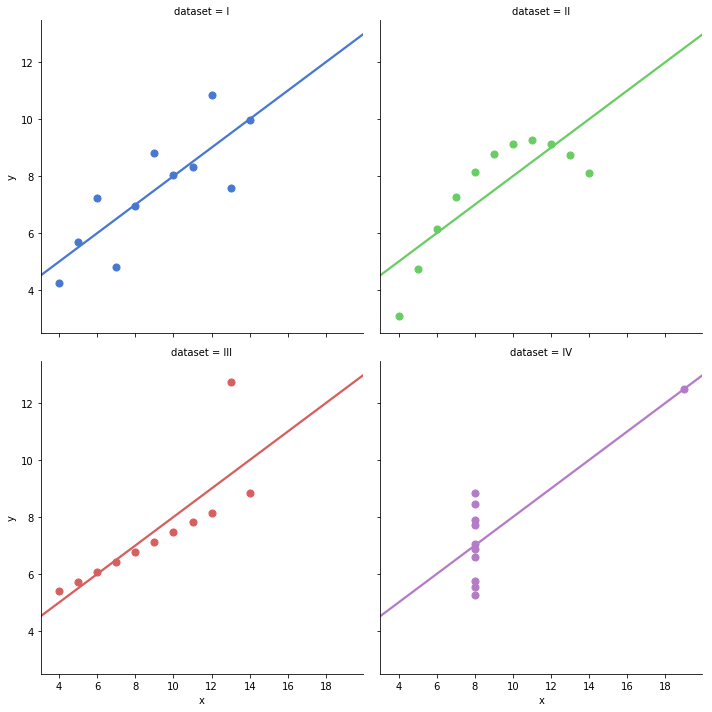

In [20]:
import matplotlib.pyplot as plt 
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", 
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

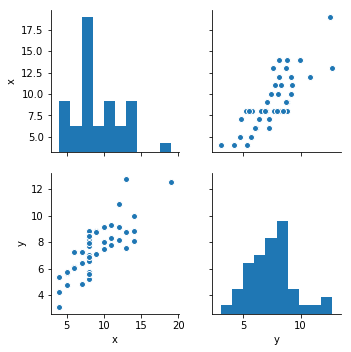

In [21]:
sns.pairplot(df)

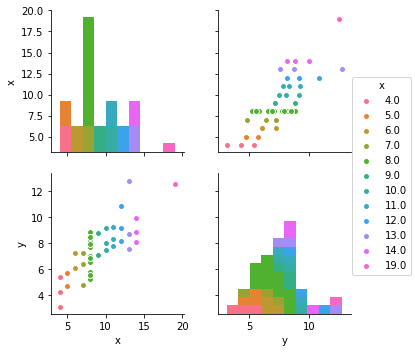

In [25]:
sns.pairplot(df, hue='x')

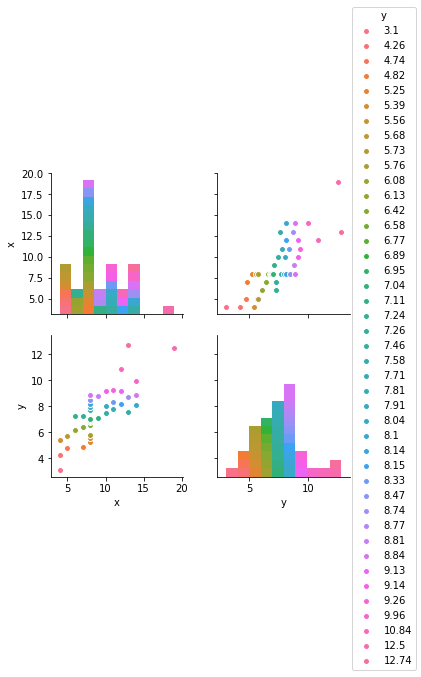

In [26]:
sns.pairplot(df, hue='y')

In [20]:
np.round(quartet.corr(), decimals=3)

,x,y
x,1.000,0.816
y,0.816,1.000


In [2]:
# Import pandas.
import pandas as pd
df =pd.read_csv("https://raw.githubusercontent.com/MarianneLawless/Fundamentals-of-DA-Pratical-Assignments/master/Anscombe2.csv")
df

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


In [3]:
df.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


In [17]:
#Pearson correlation table of the Anscombe data

np.round(df.corr(), decimals=4)

,x1,x2,x3,x4,y1,y2,y3,y4
x1,1.0000,1.0000,1.0000,-0.5000,0.8164,0.8162,0.8163,-0.3140
x2,1.0000,1.0000,1.0000,-0.5000,0.8164,0.8162,0.8163,-0.3140
x3,1.0000,1.0000,1.0000,-0.5000,0.8164,0.8162,0.8163,-0.3140
x4,-0.5000,-0.5000,-0.5000,1.0000,-0.5291,-0.7184,-0.3447,0.8165
y1,0.8164,0.8164,0.8164,-0.5291,1.0000,0.7500,0.4687,-0.4891
y2,0.8162,0.8162,0.8162,-0.7184,0.7500,1.0000,0.5879,-0.4781
y3,0.8163,0.8163,0.8163,-0.3447,0.4687,0.5879,1.0000,-0.1555
y4,-0.3140,-0.3140,-0.3140,0.8165,-0.4891,-0.4781,-0.1555,1.0000


In [15]:
from scipy import stats 
